### Using Sympy

In [11]:
import numpy as np
import sympy as sp

from sympy import init_printing
init_printing(use_latex = True)

x, nu, t = sp.symbols('x nu t')
phi = (sp.exp(-(x-4*t)**2 / (4* nu * (t+1))))+sp.exp(-(x-4*t-2*np.pi)**2 / (4*nu*(t+1)))

phi

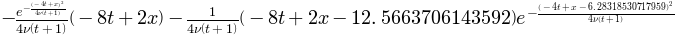

In [12]:
phiprime = phi.diff(x)
phiprime

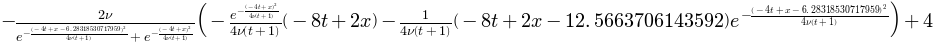

In [13]:
from sympy.utilities.lambdify import lambdify

u = -2*nu*(phiprime/phi) +4

u

In [14]:
ufunc = lambdify((t,x, nu), u)
print(ufunc(1,4,3))

3.4917066420644494


### Burgers Equation

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time, sys

%matplotlib inline

class field:
    def __init__(self, nx, len_x, nt, nu):
        
        dx = len_x/(nx-1)
        dt = dx * nu
        
        x = np.linspace(0, len_x, nx)
        t = np.linspace(0, dt*(nt), nt)
        
        self.x = x
        self.t = t
        self.nx = nx
        self.dx = dx
        self.nt = nt
        self.dt = dt
        self.grid = np.ones((nx,nt))

In [16]:
nu =0.07

ns_field = field(101, 2*np.pi, 100, nu)

ns_field.grid[:,0] = np.asarray([ufunc(0, x, nu) for x in ns_field.x])

ns_field.grid[:,0]

array([ 4.        ,  4.06283185,  4.12566371,  4.18849556,  4.25132741,
        4.31415927,  4.37699112,  4.43982297,  4.50265482,  4.56548668,
        4.62831853,  4.69115038,  4.75398224,  4.81681409,  4.87964594,
        4.9424778 ,  5.00530965,  5.0681415 ,  5.13097336,  5.19380521,
        5.25663706,  5.31946891,  5.38230077,  5.44513262,  5.50796447,
        5.57079633,  5.63362818,  5.69646003,  5.75929189,  5.82212374,
        5.88495559,  5.94778745,  6.0106193 ,  6.07345115,  6.136283  ,
        6.19911486,  6.26194671,  6.32477856,  6.38761042,  6.45044227,
        6.51327412,  6.57610598,  6.63893783,  6.70176967,  6.76460125,
        6.82742866,  6.89018589,  6.95176632,  6.99367964,  6.72527549,
        4.        ,  1.27472451,  1.00632036,  1.04823368,  1.10981411,
        1.17257134,  1.23539875,  1.29823033,  1.36106217,  1.42389402,
        1.48672588,  1.54955773,  1.61238958,  1.67522144,  1.73805329,
        1.80088514,  1.863717  ,  1.92654885,  1.9893807 ,  2.05

In [17]:
def update(field):
    u = field.grid
    nt = field.nt
    nx = field.nx
    dt = field.dt
    dx = field.dx
    for j in range(0,nt-1):
        for i in range(0,nx):
            u[i%(nx-1),j+1] = u[i%(nx-1),j] - u[i%(nx-1),j] * dt / dx *(u[i%(nx-1),j] - u[(i-1)%(nx-1),j]) + nu * dt / dx**2 *\
                (u[(i+1)%(nx-1),j] - 2 * u[i%(nx-1),j] + u[(i-1)%(nx-1),j])
        

In [18]:
print(ns_field.grid)

update(ns_field)

print(ns_field.grid)

[[ 4.          1.          1.         ...,  1.          1.          1.        ]
 [ 4.06283185  1.          1.         ...,  1.          1.          1.        ]
 [ 4.12566371  1.          1.         ...,  1.          1.          1.        ]
 ..., 
 [ 3.87433629  1.          1.         ...,  1.          1.          1.        ]
 [ 3.93716815  1.          1.         ...,  1.          1.          1.        ]
 [ 4.          1.          1.         ...,  1.          1.          1.        ]]
[[ 4.          3.98240708  3.96496858 ...,  2.80073057  2.79210554
   2.78353355]
 [ 4.06283185  4.04496259  4.02725016 ...,  2.84472434  2.83596383
   2.82725719]
 [ 4.12566371  4.10751809  4.08953174 ...,  2.88871811  2.87982212
   2.87098083]
 ..., 
 [ 3.87433629  3.85729607  3.84040542 ...,  2.71274302  2.70438896
   2.69608626]
 [ 3.93716815  3.91985158  3.902687   ...,  2.75673679  2.74824725
   2.73980991]
 [ 4.          1.          1.         ...,  1.          1.          1.        ]]


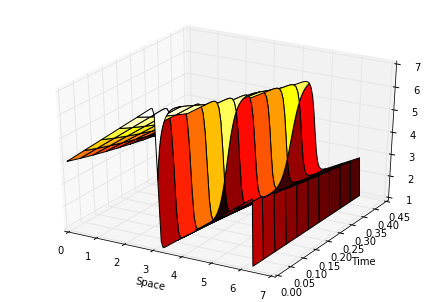

In [19]:
from mpl_toolkits.mplot3d import Axes3D

def plot(field):
    grid = field.grid
    t = field.t
    x = field.x
    
    ts, xs = np.meshgrid(t,x)

    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(xs, ts, grid, cmap='hot')
    ax.set_xlabel("Space")
    ax.set_ylabel("Time")
    
    #ax.view_init(30, 0)
    plt.show()
        

plot(ns_field)